## Przygotowanie środowiska

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import sklearn as skl

In [2]:
np.__version__

'1.17.2'

## Załadowanie danych z pliku

In [3]:
data = pd.read_csv('./online_video_dataset/transcoding_mesurment.tsv', delimiter='\t')
data.head(2)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980


## Wstępna analiza danych

In [4]:
print(data.shape)
print(data.columns)

(68784, 22)
Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')


Opis danych:
- id = Youtube videp id
- duration = duration of video
- bitrate bitrate(video) = video bitrate
- height = height of video in pixles
- width = width of video in pixles
- frame rate = actual video frame rate
- frame rate(est.) = estimated video frame rate
- codec = coding standard used for the video
- category = YouTube video category
- url = direct link to video (has expiration date)
- i = number of i frames in the video (complete image)
- p = number of p frames in the video (predicted picture)
- b = number of b frames in the video (bidirectional predicted picture)
- frames = number of frames in video
- i_size = total size in byte of i videos
- p_size = total size in byte of p videos
- b_size = total size in byte of b videos
- size = total size of video
- o_codec = output codec used for transcoding
- o_bitrate = output bitrate used for transcoding
- o_framerate = output framerate used for transcoding
- o_width = output width in pixel used for transcoding
- o_height = output height used in pixel for transcoding
- umem = total codec allocated memory for transcoding
- utime = total transcoding time for transcoding

## Analiza eksploracyjna

In [5]:
# typy danych w kolumnach
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
id             68784 non-null object
duration       68784 non-null float64
codec          68784 non-null object
width          68784 non-null int64
height         68784 non-null int64
bitrate        68784 non-null int64
framerate      68784 non-null float64
i              68784 non-null int64
p              68784 non-null int64
b              68784 non-null int64
frames         68784 non-null int64
i_size         68784 non-null int64
p_size         68784 non-null int64
b_size         68784 non-null int64
size           68784 non-null int64
o_codec        68784 non-null object
o_bitrate      68784 non-null int64
o_framerate    68784 non-null float64
o_width        68784 non-null int64
o_height       68784 non-null int64
umem           68784 non-null int64
utime          68784 non-null float64
dtypes: float64(4), int64(15), object(3)
memory usage: 11.5+ MB


In [6]:
# Jakie są podstawowe metryki statystyczne poszczególnych kolumn?
data.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [7]:
# czy są zduplikowane wartości?
len(data[data.duplicated()])

0

### Korelacja
Na co zwrócić uwagę?
* zostawić zmienne, skorelowane z targetem;
* usunąć zmienne skorelowane ze sobą.

Informacja przydaje się na etapie __Feature Selection__ - co chcemy włączyć w dataset treningowy.

In [8]:
# sns.set()

# corr = data.sample(1000).corr()

# fig, ax = plt.subplots(figsize=(50,30)) # Sample figsize in inches
# sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
# plt.show()

Widoczna jest silna korelacja pomiędzy wymiarami docelowego pliku a czasem transkodowania. 

### Analiza pól numerycznych

In [9]:
numeric_columns = data.select_dtypes(include=np.number).columns
numeric_columns

Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate',
       'o_framerate', 'o_width', 'o_height', 'umem', 'utime'],
      dtype='object')

kolumna: duration
unikalnych wartości: 1086


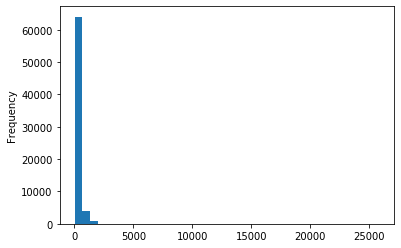

kolumna: width
unikalnych wartości: 6


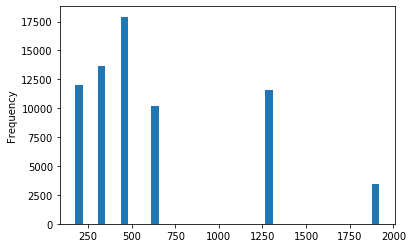

kolumna: height
unikalnych wartości: 6


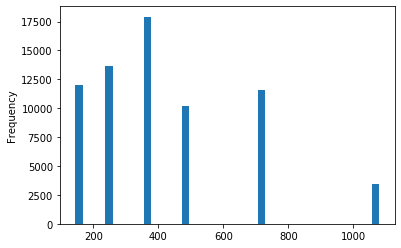

kolumna: bitrate
unikalnych wartości: 1095


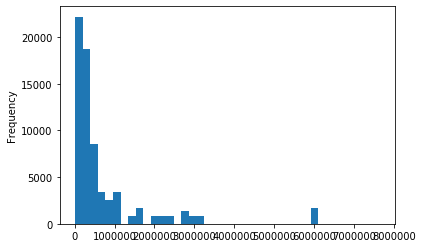

kolumna: framerate
unikalnych wartości: 261


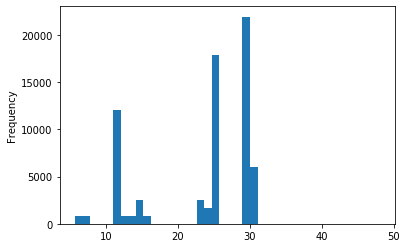

kolumna: i
unikalnych wartości: 306


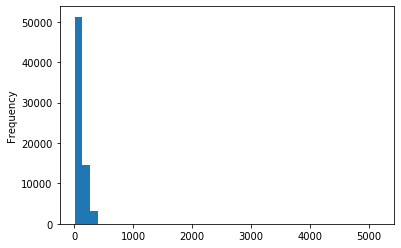

kolumna: p
unikalnych wartości: 1042


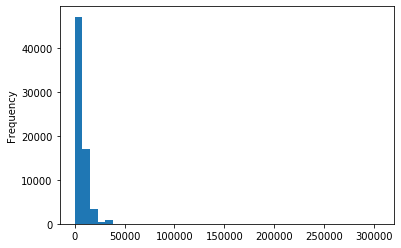

kolumna: b
unikalnych wartości: 20


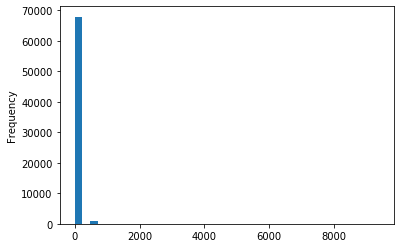

kolumna: frames
unikalnych wartości: 1044


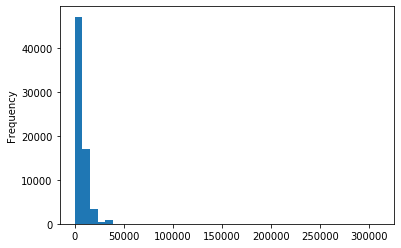

kolumna: i_size
unikalnych wartości: 1099


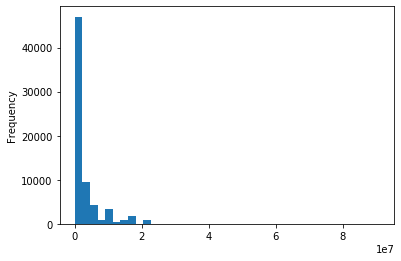

kolumna: p_size
unikalnych wartości: 1099


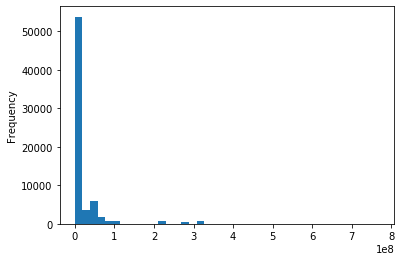

kolumna: b_size
unikalnych wartości: 1


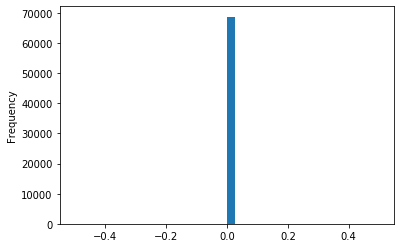

kolumna: size
unikalnych wartości: 1099


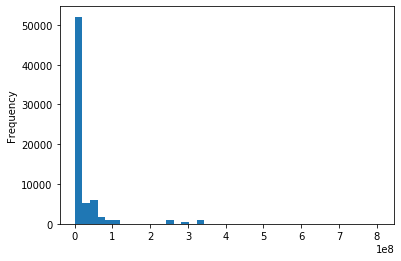

kolumna: o_bitrate
unikalnych wartości: 7


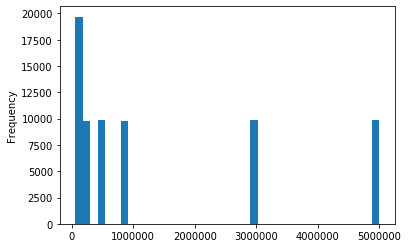

kolumna: o_framerate
unikalnych wartości: 5


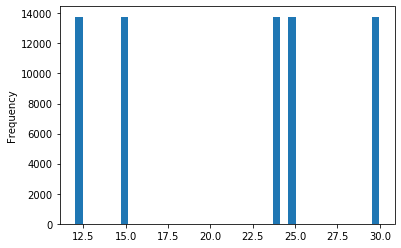

kolumna: o_width
unikalnych wartości: 6


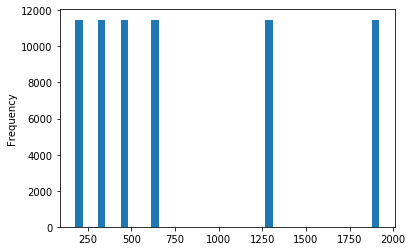

kolumna: o_height
unikalnych wartości: 6


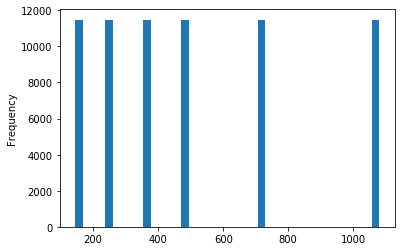

kolumna: umem
unikalnych wartości: 9395


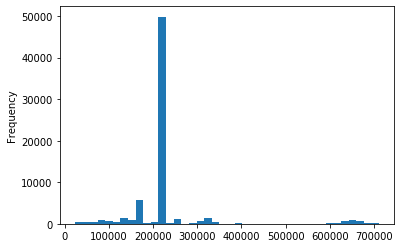

kolumna: utime
unikalnych wartości: 10960


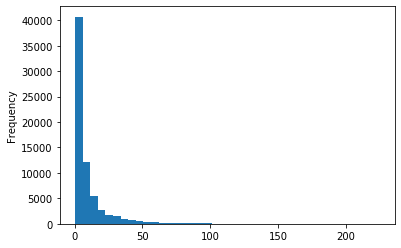

In [10]:
for col in numeric_columns:
  print(f'kolumna: {col}')
  print(f'unikalnych wartości: {len(data[col].unique())}')
  data[col].plot.hist(bins=40)
  plt.show()

In [11]:
print(f"unikalnych wartości w 'b_size': {len(data['b_size'].unique())}")
print(f"Wierszy z polem 'b' != 0: {len(data[data['b'] > 0])}")
print(f"Wierszy z polem 'b' != 0: {len(data[data['b'] > 0])/len(data)*100}%")

unikalnych wartości w 'b_size': 1
Wierszy z polem 'b' != 0: 859
Wierszy z polem 'b' != 0: 1.248836938822982%


#### Wnioski
Kolumna 'b_size' nie zawiera niezerowych wartości. Można ją usunąć.
Kolumna 'b' jest niezerowa w ~1% przypadków.

#### Analiza kolumn kategorycznych

In [12]:
non_numeric_columns = data.select_dtypes(exclude=np.number).columns
non_numeric_columns

Index(['id', 'codec', 'o_codec'], dtype='object')

kolumna: id
unikalnych wartości: 1099
kolumna: codec
unikalnych wartości: 4


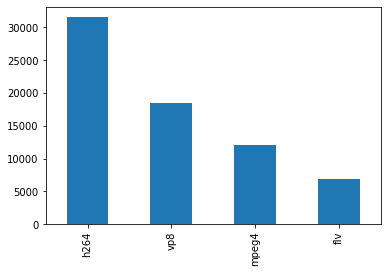

kolumna: o_codec
unikalnych wartości: 4


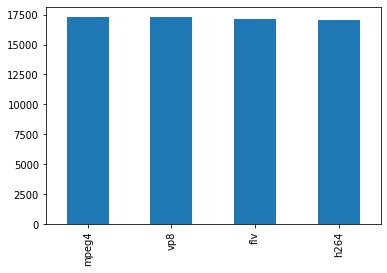

In [13]:
for col in non_numeric_columns:
  print(f'kolumna: {col}')
  print(f'unikalnych wartości: {len(data[col].unique())}')
  if len(data[col].unique()) < 15:
    data[col].value_counts().plot.bar()
    plt.show()

### Wartości brakujące

In [14]:
data.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

## Outliers

In [15]:
data_2 = data.copy()

Do obcięcia outlierów pomocniczo wykorzystujemy poniższe wzory:
- IQR (interquartile range) = P(75) - P(25)
- Dolna_granica = P(25) - 1,5*IQR
- Gorna_granica = P(75) + 1,5*IQR
- (P - percentyl)


In [16]:
def outliners_range(data, column_name):
    rows = data[column_name]
    iqr = np.nanpercentile(rows, 75) - np.nanpercentile(rows, 25)
    lower = (np.nanpercentile(rows, 25) - 1.5*iqr)
    upper = (np.nanpercentile(rows, 75) + 1.5*iqr) 
    return lower, upper

### Kolumny numeryczne

In [17]:
numeric_columns = data_2.select_dtypes(include=np.number).columns
numeric_data = data_2[numeric_columns]
numeric_data.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,176,144,22508,0.612
1,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,320,240,25164,0.980
2,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,480,360,29228,1.216
3,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,640,480,34316,1.692
4,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,1280,720,58528,3.456


Kolumna: duration


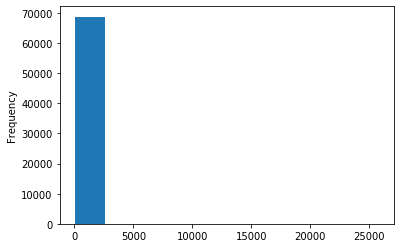

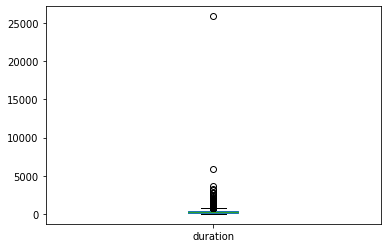

Kolumna: width


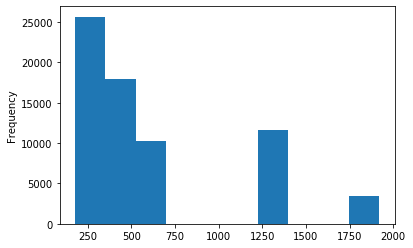

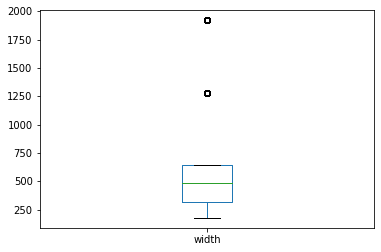

Kolumna: height


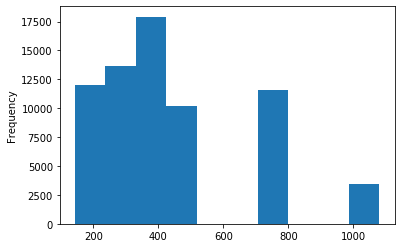

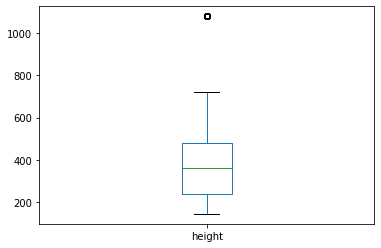

Kolumna: bitrate


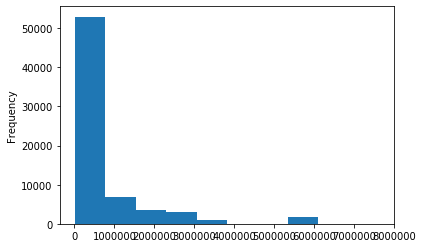

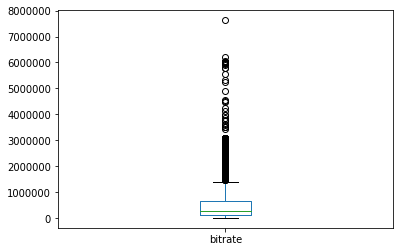

Kolumna: framerate


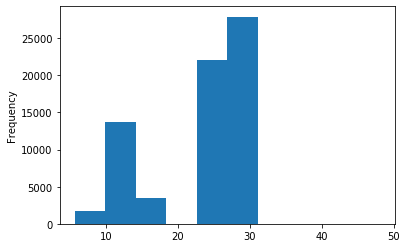

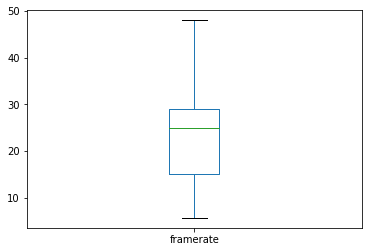

Kolumna: i


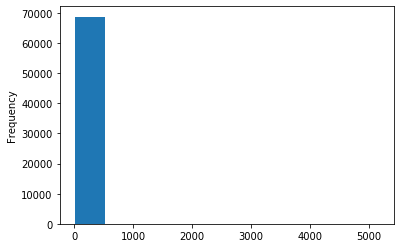

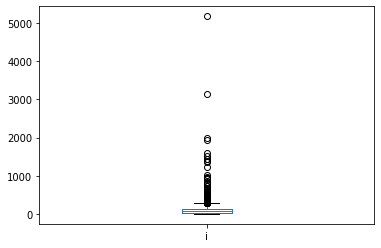

Kolumna: p


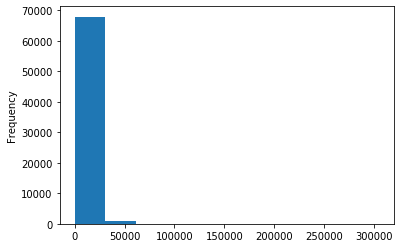

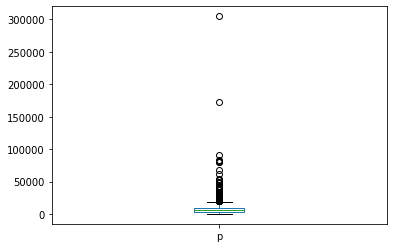

Kolumna: b


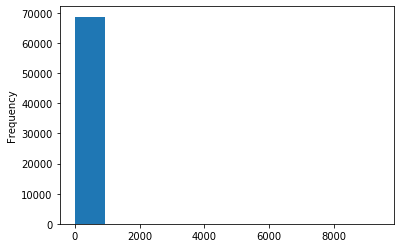

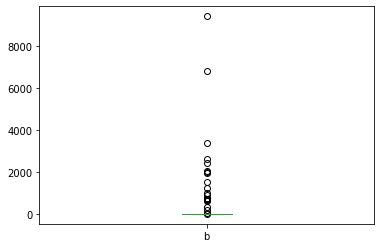

Kolumna: frames


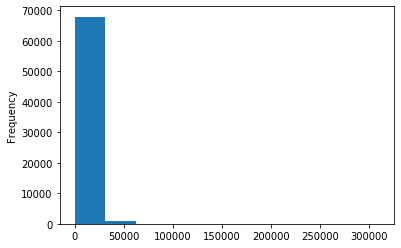

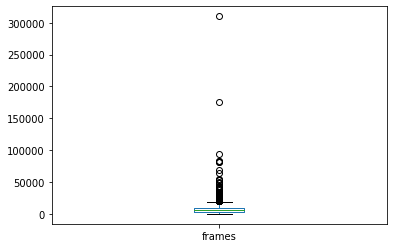

Kolumna: i_size


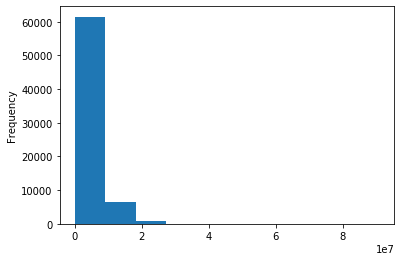

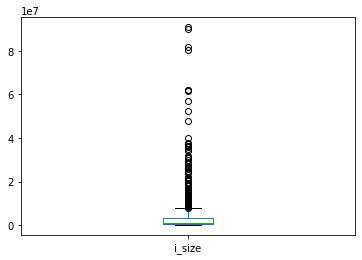

Kolumna: p_size


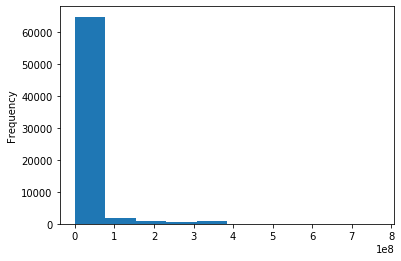

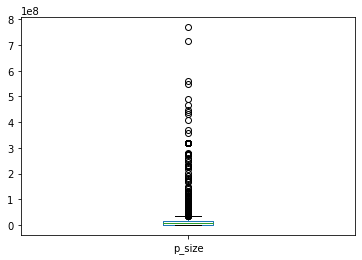

Kolumna: b_size


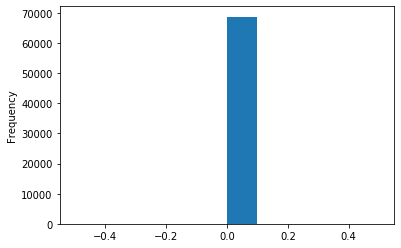

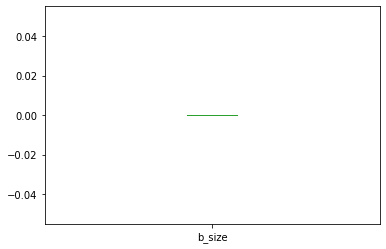

Kolumna: size


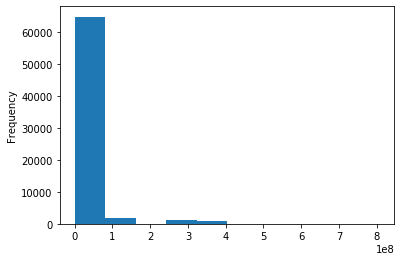

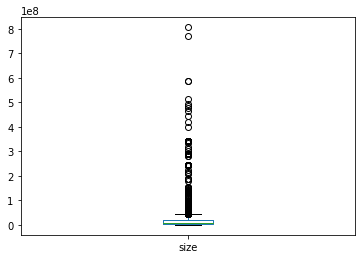

Kolumna: o_bitrate


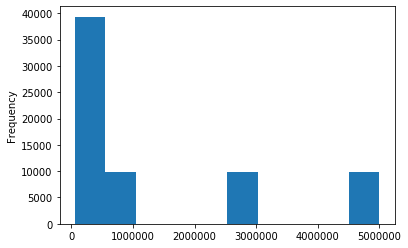

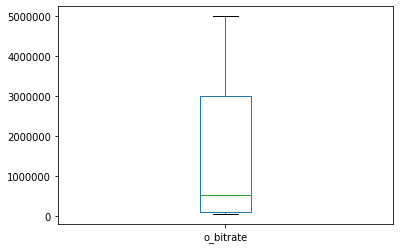

Kolumna: o_framerate


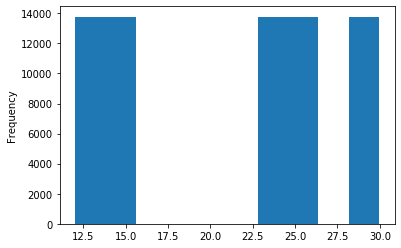

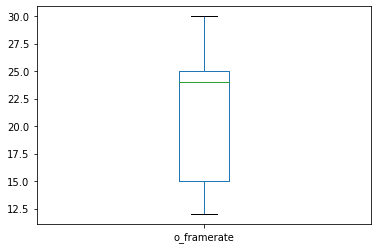

Kolumna: o_width


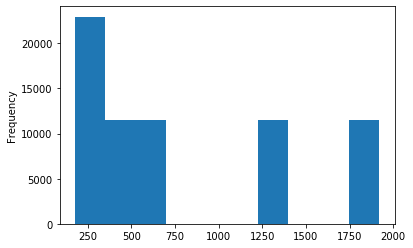

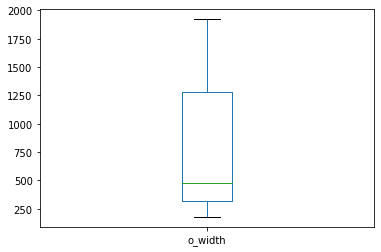

Kolumna: o_height


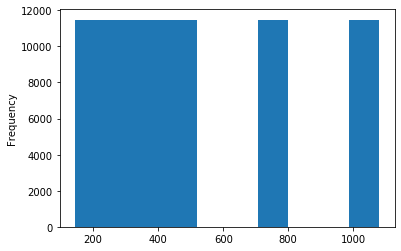

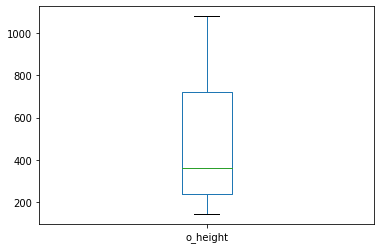

Kolumna: umem


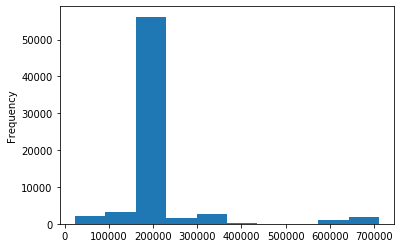

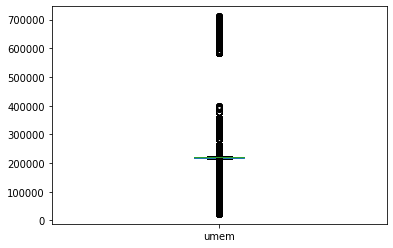

Kolumna: utime


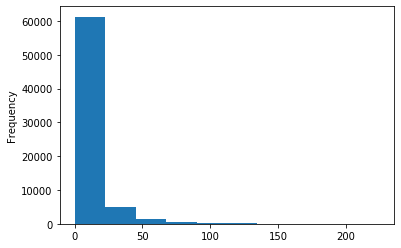

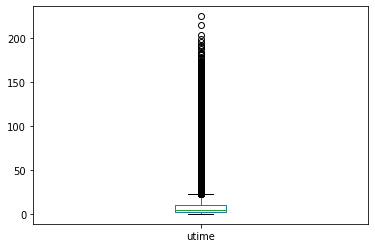

In [18]:
# wizualizacja rozkładu danych poszczególnych kolumn
for column in numeric_data:
  print(f'Kolumna: {column}')
  numeric_data[column].plot.hist()
  plt.show()
  numeric_data[column].plot.box()
  plt.show()

#### Kolumna "frames"

In [19]:
lower, upper = outliners_range(numeric_data, 'frames')
lower, upper

(-7805.5, 19454.5)

In [20]:
num = len(numeric_data[numeric_data["frames"]>upper])
print(f'wartości >{upper}: {num} ({round(num/len(data_2)*100, 2)}%)')
num = len(numeric_data[numeric_data["frames"]>30000])
print(f'wartości >30k: {num} ({round(num/len(data_2)*100, 2)}%)')
num = len(numeric_data[numeric_data["frames"]>40000])
print(f'wartości >35k: {num} ({round(num/len(data_2)*100, 2)}%)')

wartości >19454.5: 3076 (4.47%)
wartości >30k: 869 (1.26%)
wartości >35k: 20 (0.03%)


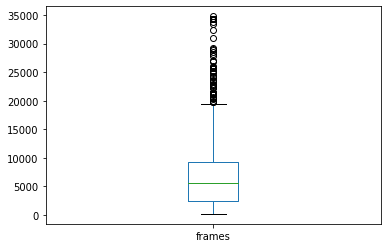

In [21]:
# Obcięcie outlierów ( usunięcie wierszy z wart. >35k)
data_2 = data_2[data_2['frames'] <= 35000 ]

data_2['frames'].plot.box()
plt.show()

#### Kolumna "duration"

In [22]:
lower, upper = outliners_range(numeric_data, 'duration')
lower, upper

(-302.0675, 788.1524999999999)

In [23]:
num = len(numeric_data[numeric_data["duration"]>788])
print(f'wartości >788: {num} ({round(num/len(data_2)*100, 2)}%)')
num = len(numeric_data[numeric_data["duration"]>1000])
print(f'wartości >1000: {num} ({round(num/len(data_2)*100, 2)}%)')
num = len(numeric_data[numeric_data["duration"]>1500])
print(f'wartości >1500: {num} ({round(num/len(data_2)*100, 2)}%)')
num = len(numeric_data[numeric_data["duration"]>2000])
print(f'wartości >2000: {num} ({round(num/len(data_2)*100, 2)}%)')

wartości >788: 3080 (4.48%)
wartości >1000: 1718 (2.5%)
wartości >1500: 865 (1.26%)
wartości >2000: 13 (0.02%)


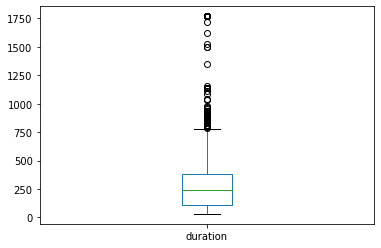

In [24]:
# Obcięcie outlierów ( usunięcie wierszy z wart. >2k)
data_2 = data_2[data_2['duration'] <= 2000 ]

data_2['duration'].plot.box()
plt.show()

## Feature Engineering

In [25]:
data_3 = data_2.copy()

In [26]:
codecs_with_b    = data_3[data_3['b']==0]['codec'].unique()
codecs_without_b = data_3[data_3['b']!=0]['codec'].unique()
print(f"codecs_with_b: {codecs_with_b}")
print(f"codecs_without_b: {codecs_without_b}")

codecs_with_b: ['mpeg4' 'h264' 'vp8' 'flv']
codecs_without_b: ['h264']


Wniosek: Parametr 'b' jest niezerowy tylko w przypadku użycia kodeka 'h264'

#### Dodatkowe pole - pixels (width*height)

In [27]:
data_3['pixels'] = data_3['width'] * data_3['height']
data_3.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime,pixels
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,176,144,22508,0.612,25344
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,320,240,25164,0.980,25344
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,480,360,29228,1.216,25344
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,640,480,34316,1.692,25344
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456,25344


#### Dodatkowe pole - o_pixels (o_width*o_height)

In [28]:
data_3['o_pixels'] = data_3['o_width'] * data_3['o_height']
data_3.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime,pixels,o_pixels
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,889537,mpeg4,56000,12.0,176,144,22508,0.612,25344,25344
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,889537,mpeg4,56000,12.0,320,240,25164,0.980,25344,76800
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,889537,mpeg4,56000,12.0,480,360,29228,1.216,25344,172800
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,889537,mpeg4,56000,12.0,640,480,34316,1.692,25344,307200
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,889537,mpeg4,56000,12.0,1280,720,58528,3.456,25344,921600


## Feature selection - usunięcie zbędnych kolumn
- pole id
- pole b_size (brak niezerowych wartości)
- pole umem (wartość wynikowa, jednak nie podlegająca analizie)

In [29]:
data_4 = data_3.copy()

In [30]:
data_4 = data_4.drop(['id', 'b_size', 'umem'], axis=1)
data_4.head(3)

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,p_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,utime,pixels,o_pixels
0,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,176,144,0.612,25344,25344
1,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,320,240,0.980,25344,76800
2,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,480,360,1.216,25344,172800


## Data Preparation - przygotowanie danych do uczenia
- kodowanie pól kategorycznych
- skalowanie danych

In [31]:
data_5 = data_4.copy()
data_5.head()

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,p_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,utime,pixels,o_pixels
0,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,176,144,0.612,25344,25344
1,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,320,240,0.980,25344,76800
2,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,480,360,1.216,25344,172800
3,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,640,480,1.692,25344,307200
4,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,889537,mpeg4,56000,12.0,1280,720,3.456,25344,921600


In [32]:
categorical_cols = ['codec', 'o_codec']
for column in categorical_cols:
  print(column)
  print(data_5[column].unique())

codec
['mpeg4' 'h264' 'vp8' 'flv']
o_codec
['mpeg4' 'vp8' 'flv' 'h264']


In [33]:
ohe = ce.OneHotEncoder(cols=categorical_cols, return_df=True, 
        use_cat_names=True, handle_unknown=0)
data_5 = ohe.fit_transform(data_5)
data_5.head()

,duration,codec_mpeg4,codec_h264,codec_vp8,codec_flv,width,height,bitrate,framerate,i,...,o_codec_vp8,o_codec_flv,o_codec_h264,o_bitrate,o_framerate,o_width,o_height,utime,pixels,o_pixels
0,130.35667,1,0,0,0,176,144,54590,12.0,27,...,0,0,0,56000,12.0,176,144,0.612,25344,25344
1,130.35667,1,0,0,0,176,144,54590,12.0,27,...,0,0,0,56000,12.0,320,240,0.980,25344,76800
2,130.35667,1,0,0,0,176,144,54590,12.0,27,...,0,0,0,56000,12.0,480,360,1.216,25344,172800
3,130.35667,1,0,0,0,176,144,54590,12.0,27,...,0,0,0,56000,12.0,640,480,1.692,25344,307200
4,130.35667,1,0,0,0,176,144,54590,12.0,27,...,0,0,0,56000,12.0,1280,720,3.456,25344,921600


In [34]:
data_5.info() # teraz wszystkie pola są numeryczne

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68759 entries, 0 to 68783
Data columns (total 27 columns):
duration         68759 non-null float64
codec_mpeg4      68759 non-null int64
codec_h264       68759 non-null int64
codec_vp8        68759 non-null int64
codec_flv        68759 non-null int64
width            68759 non-null int64
height           68759 non-null int64
bitrate          68759 non-null int64
framerate        68759 non-null float64
i                68759 non-null int64
p                68759 non-null int64
b                68759 non-null int64
frames           68759 non-null int64
i_size           68759 non-null int64
p_size           68759 non-null int64
size             68759 non-null int64
o_codec_mpeg4    68759 non-null int64
o_codec_vp8      68759 non-null int64
o_codec_flv      68759 non-null int64
o_codec_h264     68759 non-null int64
o_bitrate        68759 non-null int64
o_framerate      68759 non-null float64
o_width          68759 non-null int64
o_height   

### Podział na 'target' i 'features'

In [35]:
target = data_5['utime']
features = data_5.drop('utime', axis=1)

In [36]:
print(features.shape)
features.head(2)

(68759, 26)


,duration,codec_mpeg4,codec_h264,codec_vp8,codec_flv,width,height,bitrate,framerate,i,...,o_codec_mpeg4,o_codec_vp8,o_codec_flv,o_codec_h264,o_bitrate,o_framerate,o_width,o_height,pixels,o_pixels
0,130.35667,1,0,0,0,176,144,54590,12.0,27,...,1,0,0,0,56000,12.0,176,144,25344,25344
1,130.35667,1,0,0,0,176,144,54590,12.0,27,...,1,0,0,0,56000,12.0,320,240,25344,76800


In [37]:
print(target.shape)
target.head(2)

(68759,)


0    0.612
1    0.980
Name: utime, dtype: float64

### Skalowanie danych

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled[1]

array([5.71257598e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.06371427e-03,
       1.48820418e-01, 1.00959112e-02, 3.96760662e-02, 0.00000000e+00,
       3.96738187e-02, 5.81774952e-04, 1.02892969e-03, 8.65023435e-04,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.25688073e-02, 1.02564103e-01,
       0.00000000e+00, 2.51218598e-02])

In [39]:
features_scaled.shape

(68759, 26)

## Trenowanie modeli

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

### Podział na dane trenujące i testujące

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, 
                                                    target, 
                                                    test_size=0.3, random_state=0)

### Podstawowy model regresji liniowej

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Mean squared error of a linear model: %.2f" % 
      mean_squared_error(y_test, lr.predict(X_test)))
score = lr.score(X_test, y_test) #r2_score
print("Linear Regression R2 score: %.2f" % score)

Mean squared error of a linear model: 124.55
Linear Regression R2 score: 0.53


### Wyszukiwanie optymalnego modelu z wykorzystaniem Polynominal Features, ElasticNet oraz GridSearch

In [43]:
parameters=[{
     'alpha':[0.1, 0.2, 0.5, 0.9], 
     'l1_ratio':[0.1, 0.2, 0.5, 0.9],
     }
]
 
for pf_level in range(1,3):
    print(f"polynominal features level {pf_level}:")

    pf = PolynomialFeatures(pf_level)
    train_poly = pf.fit_transform(X_train)
    test_poly  = pf.fit_transform(X_test)
    
    model = GridSearchCV( ElasticNet(), parameters, cv=5 )
    model.fit(train_poly, y_train)

    print(f"  {model.best_estimator_}")
    print("    Mean squared error: %.2f" % 
    mean_squared_error(y_test, model.predict(test_poly)))
    score = model.score(test_poly, y_test) #r2_score
    print("    R2 score: %.2f" % score)

polynominal features level 1:
  ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
    Mean squared error: 127.97
    R2 score: 0.52
polynominal features level 2:
  ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
    Mean squared error: 57.47
    R2 score: 0.78
